In [137]:
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


%matplotlib inline


The type of this input is <class 'numpy.ndarray'>
Shape: (452, 678, 3)


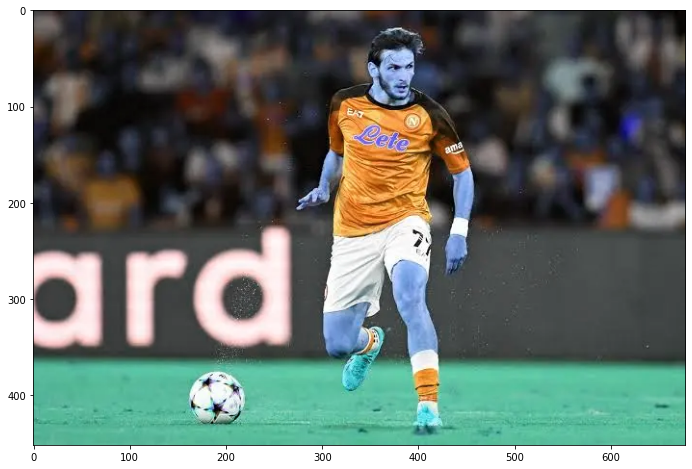

In [138]:
image = cv2.imread('Player.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.figure(figsize=(20,8))
plt.imshow(image)

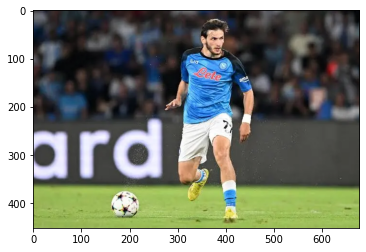

In [139]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [140]:
#Converts the image from BGR (Blue-Green-Red) to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

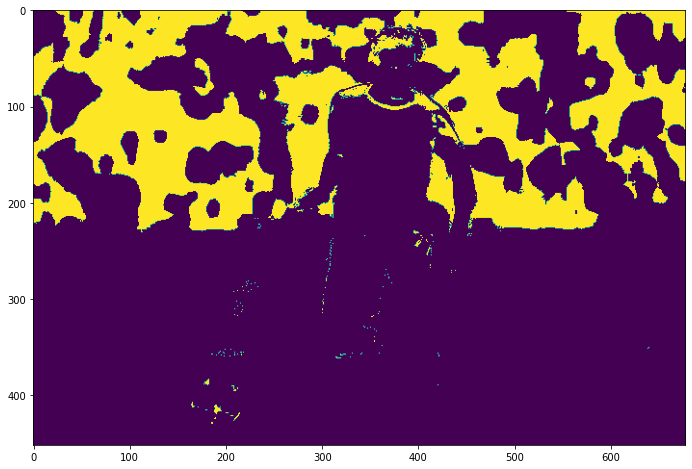

In [141]:
#identifying black color

lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])
mask = cv2.inRange(hsv, lower_black, upper_black)
plt.figure(figsize=(20,8))
plt.imshow(mask)

In [142]:
#identifying white color
lower_white = np.array([0, 0, 200])
upper_white = np.array([255, 30, 255])

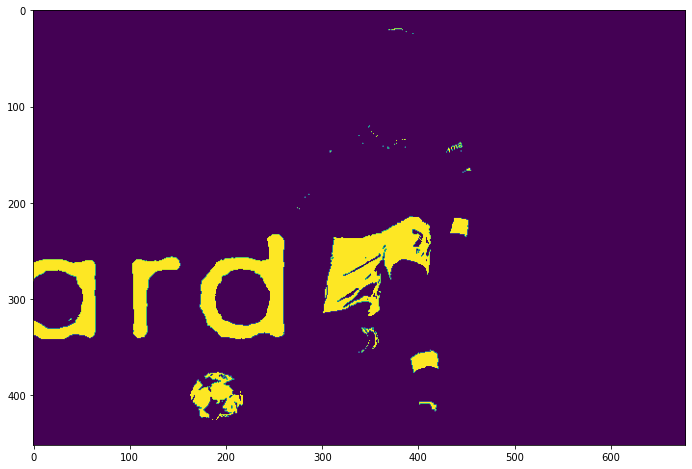

In [143]:
mask = cv2.inRange(hsv, lower_white, upper_white)
plt.figure(figsize=(20,8))
plt.imshow(mask)

In [144]:
#identifying green color
lower_green = np.array([40, 50, 50])
upper_green = np.array([90, 255, 255])

mask = cv2.inRange(hsv , lower_green , upper_green)

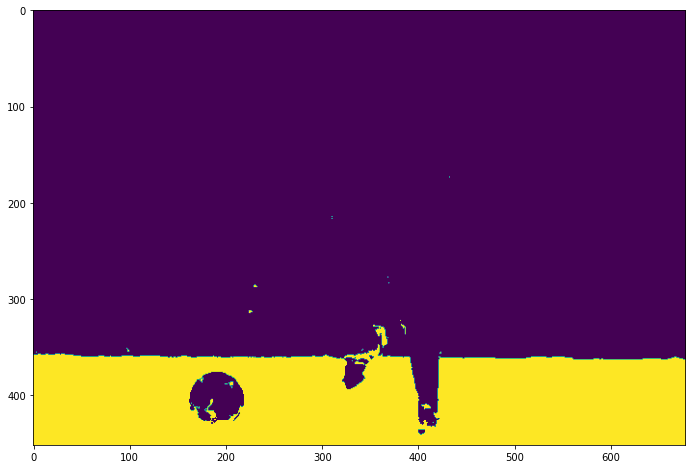

In [145]:
plt.figure(figsize=(20,8))
plt.imshow(mask)

The type of this input is <class 'numpy.ndarray'>
Shape: (452, 678, 3)


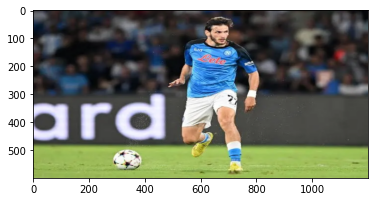

In [146]:
#Now, the last step is: identifying all the colors present in the  picture

image = cv2.imread('Player.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors, n_init=10)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([22.21843384, 22.07007716, 25.00060017]),
 array([158.26386421, 187.89936141,  89.95729102]),
 array([69.53315783, 71.83417411, 71.47787272]),
 array([229.20885039, 229.61677593, 243.69638258]),
 array([ 66.69509425, 146.89859187, 222.34771747]),
 array([110.31674049, 111.99149265, 109.57765591]),
 array([199.5815725 , 168.4896164 , 154.28312324]),
 array([46.53888248, 44.89428578, 48.20371752])]

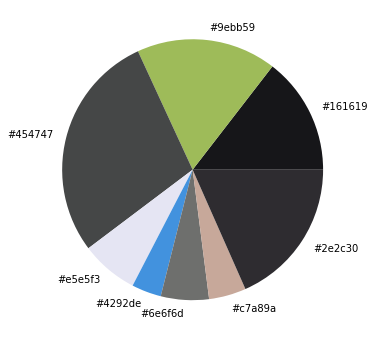

In [147]:
get_colors(get_image('Player.jpg'), 8, True)